In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense


from sklearn.preprocessing import MinMaxScaler

In [6]:
df=pd.read_csv("NSE-Tata-Global-Beverages-Limited.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


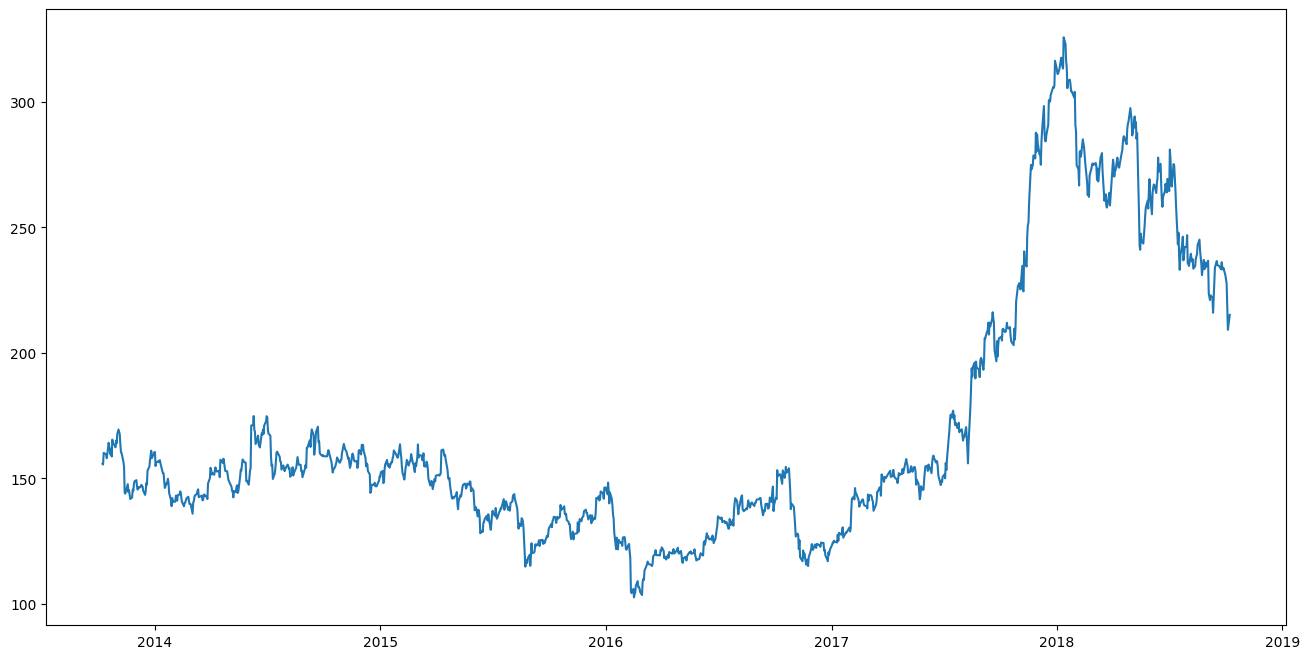

In [7]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']

plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [12]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]

print('Done.')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_28692\3093609825.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_dataset["Date"][i]=data['Date'][i]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_28692\3093609825.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignmen

Done.


In [13]:
# Drop the Date column for scaling
new_dataset.drop("Date",axis=1,inplace=True)

# Scale the data
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_dataset.values
scaled_data=scaler.fit_transform(final_dataset)

# Split the data into training & validation sets
train_data=final_dataset[0:987,:]
valid_data=final_dataset[987:,:]

final_dataset

array([[155.8],
       [155.55],
       [160.15],
       ...,
       [218.2],
       [209.2],
       [215.15]], dtype=object)

In [14]:
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [15]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


927/927 - 27s - 30ms/step - loss: 8.6370e-04


In [16]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


In [17]:
lstm_model.save("saved_model.h5")

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_28692\107833647.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=predicted_closing_price


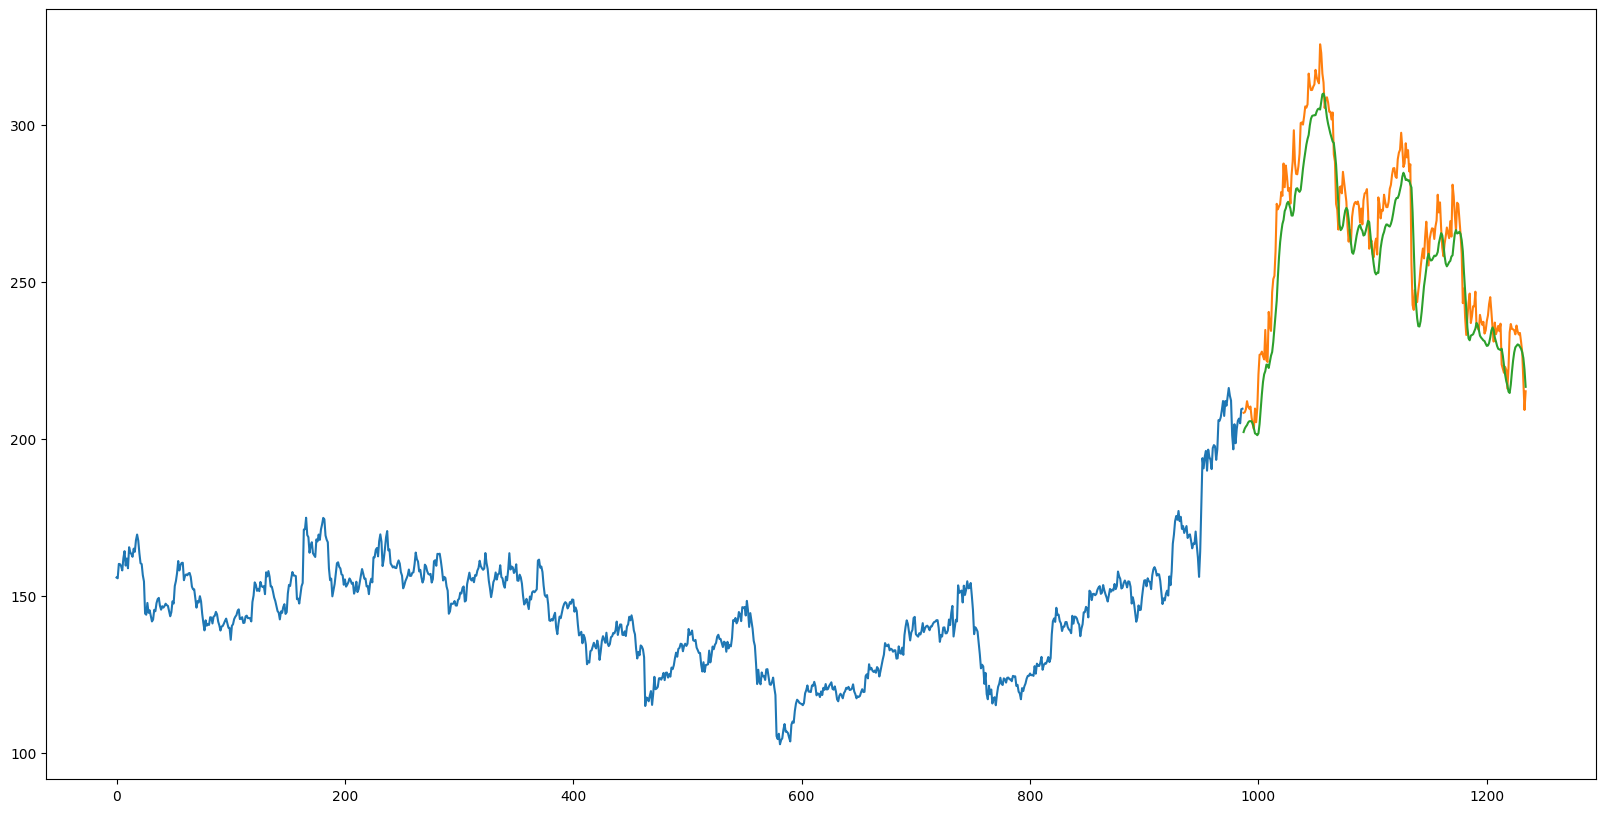

In [18]:
train_data=new_dataset[:987]
valid_data=new_dataset[987:]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])

In [21]:
pip install dash


   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
    --------------------------------------- 0.1/7.5 MB 1.3 MB/s eta 0:00:06
    --------------------------------------- 0.2/7.5 MB 1.5 MB/s eta 0:00:05
   - -------------------------------------- 0.3/7.5 MB 1.9 MB/s eta 0:00:04
   -- ------------------------------------- 0.4/7.5 MB 2.1 MB/s eta 0:00:04
   -- ------------------------------------- 0.5/7.5 MB 2.3 MB/s eta 0:00:04
   --- ------------------------------------ 0.7/7.5 MB 2.7 MB/s eta 0:00:03
   ---- ----------------------------------- 0.9/7.5 MB 2.9 MB/s eta 0:00:03
   ----- ---------------------------------- 1.1/7.5 MB 2.9 MB/s eta 0:00:03
   ------ --------------------------------- 1.2/7.5 MB 3.0 MB/s eta 0:00:03
   ------- -------------------------------- 1.3/7.5 MB 3.0 MB/s eta 0:00:03
   ------- -------------------------------- 1.5/7.5 MB 3.1 MB/s eta 0:00:02
   -------- -------------

In [31]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.graph_objs as go
from dash.dependencies import Input, Output
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import numpy as np


app = dash.Dash()
server = app.server

scaler=MinMaxScaler(feature_range=(0,1))

df_nse = pd.read_csv("NSE-Tata-Global-Beverages-Limited.csv")

df_nse["Date"]=pd.to_datetime(df_nse.Date,format="%Y-%m-%d")
df_nse.index=df_nse['Date']


data=df_nse.sort_index(ascending=True,axis=0)
new_data=pd.DataFrame(index=range(0,len(df_nse)),columns=['Date','Close'])

for i in range(0,len(data)):
    new_data["Date"][i]=data['Date'][i]
    new_data["Close"][i]=data["Close"][i]

new_data.index=new_data.Date
new_data.drop("Date",axis=1,inplace=True)

dataset=new_data.values

train=dataset[0:987,:]
valid=dataset[987:,:]

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

x_train,y_train=[],[]

for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
    
x_train,y_train=np.array(x_train),np.array(y_train)

x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

model=load_model("saved_model.h5")

inputs=new_data[len(new_data)-len(valid)-60:].values
inputs=inputs.reshape(-1,1)
inputs=scaler.transform(inputs)

X_test=[]
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
closing_price=model.predict(X_test)
closing_price=scaler.inverse_transform(closing_price)

train=new_data[:987]
valid=new_data[987:]
valid['Predictions']=closing_price



df= pd.read_csv("stock_data.csv")

app.layout = html.Div([
   
    html.H1("Stock Price Analysis Dashboard", style={"textAlign": "center"}),
   
    dcc.Tabs(id="tabs", children=[
       
        dcc.Tab(label='NSE-TATAGLOBAL Stock Data',children=[
            html.Div([
                html.H2("Actual closing price",style={"textAlign": "center"}),
                dcc.Graph(
                    id="Actual Data",
                    figure={
                        "data":[
                            go.Scatter(
                                x=train.index,
                                y=valid["Close"],
                                mode='markers'
                            )

                        ],
                        "layout":go.Layout(
                            title='scatter plot',
                            xaxis={'title':'Date'},
                            yaxis={'title':'Closing Rate'}
                        )
                    }

                ),
                html.H2("LSTM Predicted closing price",style={"textAlign": "center"}),
                dcc.Graph(
                    id="Predicted Data",
                    figure={
                        "data":[
                            go.Scatter(
                                x=valid.index,
                                y=valid["Predictions"],
                                mode='markers'
                            )

                        ],
                        "layout":go.Layout(
                            title='scatter plot',
                            xaxis={'title':'Date'},
                            yaxis={'title':'Closing Rate'}
                        )
                    }

                )                
            ])                


        ]),
        dcc.Tab(label='Facebook Stock Data', children=[
            html.Div([
                html.H1("Facebook Stocks High vs Lows", 
                        style={'textAlign': 'center'}),
              
                dcc.Dropdown(id='my-dropdown',
                             options=[{'label': 'Tesla', 'value': 'TSLA'},
                                      {'label': 'Apple','value': 'AAPL'}, 
                                      {'label': 'Facebook', 'value': 'FB'}, 
                                      {'label': 'Microsoft','value': 'MSFT'}], 
                             multi=True,value=['FB'],
                             style={"display": "block", "margin-left": "auto", 
                                    "margin-right": "auto", "width": "60%"}),
                dcc.Graph(id='highlow'),
                html.H1("Facebook Market Volume", style={'textAlign': 'center'}),
         
                dcc.Dropdown(id='my-dropdown2',
                             options=[{'label': 'Tesla', 'value': 'TSLA'},
                                      {'label': 'Apple','value': 'AAPL'}, 
                                      {'label': 'Facebook', 'value': 'FB'},
                                      {'label': 'Microsoft','value': 'MSFT'}], 
                             multi=True,value=['FB'],
                             style={"display": "block", "margin-left": "auto", 
                                    "margin-right": "auto", "width": "60%"}),
                dcc.Graph(id='volume')
            ], className="container"),
        ])


    ])
])


@app.callback(Output('highlow', 'figure'),
              [Input('my-dropdown', 'value')])
def update_graph(selected_dropdown):
    dropdown = {"TSLA": "Tesla","AAPL": "Apple","FB": "Facebook","MSFT": "Microsoft",}
    trace1 = []
    trace2 = []
    for stock in selected_dropdown:
        trace1.append(
          go.Scatter(x=df[df["Stock"] == stock]["Date"],
                     y=df[df["Stock"] == stock]["High"],
                     mode='lines', opacity=0.7, 
                     name=f'High {dropdown[stock]}',textposition='bottom center'))
        trace2.append(
          go.Scatter(x=df[df["Stock"] == stock]["Date"],
                     y=df[df["Stock"] == stock]["Low"],
                     mode='lines', opacity=0.6,
                     name=f'Low {dropdown[stock]}',textposition='bottom center'))
    traces = [trace1, trace2]
    data = [val for sublist in traces for val in sublist]
    figure = {'data': data,
              'layout': go.Layout(colorway=["#5E0DAC", '#FF4F00', '#375CB1', 
                                            '#FF7400', '#FFF400', '#FF0056'],
            height=600,
            title=f"High and Low Prices for {', '.join(str(dropdown[i]) for i in selected_dropdown)} Over Time",
            xaxis={"title":"Date",
                   'rangeselector': {'buttons': list([{'count': 1, 'label': '1M', 
                                                       'step': 'month', 
                                                       'stepmode': 'backward'},
                                                      {'count': 6, 'label': '6M', 
                                                       'step': 'month', 
                                                       'stepmode': 'backward'},
                                                      {'step': 'all'}])},
                   'rangeslider': {'visible': True}, 'type': 'date'},
             yaxis={"title":"Price (USD)"})}
    return figure


@app.callback(Output('volume', 'figure'),
              [Input('my-dropdown2', 'value')])
def update_graph(selected_dropdown_value):
    dropdown = {"TSLA": "Tesla","AAPL": "Apple","FB": "Facebook","MSFT": "Microsoft",}
    trace1 = []
    for stock in selected_dropdown_value:
        trace1.append(
          go.Scatter(x=df[df["Stock"] == stock]["Date"],
                     y=df[df["Stock"] == stock]["Volume"],
                     mode='lines', opacity=0.7,
                     name=f'Volume {dropdown[stock]}', textposition='bottom center'))
    traces = [trace1]
    data = [val for sublist in traces for val in sublist]
    figure = {'data': data, 
              'layout': go.Layout(colorway=["#5E0DAC", '#FF4F00', '#375CB1', 
                                            '#FF7400', '#FFF400', '#FF0056'],
            height=600,
            title=f"Market Volume for {', '.join(str(dropdown[i]) for i in selected_dropdown_value)} Over Time",
            xaxis={"title":"Date",
                   'rangeselector': {'buttons': list([{'count': 1, 'label': '1M', 
                                                       'step': 'month', 
                                                       'stepmode': 'backward'},
                                                      {'count': 6, 'label': '6M',
                                                       'step': 'month', 
                                                       'stepmode': 'backward'},
                                                      {'step': 'all'}])},
                   'rangeslider': {'visible': True}, 'type': 'date'},
             yaxis={"title":"Transactions Volume"})}
    return figure


if __name__=='__main__':
    app.run_server(debug=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_28692\3481864530.py:27: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_28692\3481864530.py:27: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this k

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_28692\3481864530.py:68: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.graph_objs as go
from dash.dependencies import Input, Output
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import numpy as np

app = dash.Dash()
server = app.server

scaler = MinMaxScaler(feature_range=(0, 1))

# Function to load and process data, train model, and make predictions
def load_and_predict(file_path):
    df = pd.read_csv(file_path)
    df["Date"] = pd.to_datetime(df.Date, format="%Y-%m-%d")
    df.index = df['Date']
    
    data = df.sort_index(ascending=True, axis=0)
    new_data = pd.DataFrame(index=range(0, len(df)), columns=['Date', 'Close'])
    
    for i in range(0, len(data)):
        new_data["Date"][i] = data['Date'][i]
        new_data["Close"][i] = data["Close"][i]
    
    new_data.index = new_data.Date
    new_data.drop("Date", axis=1, inplace=True)
    dataset = new_data.values
    
    train = dataset[0:int(len(dataset)*0.8), :]
    valid = dataset[int(len(dataset)*0.8):, :]
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)
    
    x_train, y_train = [], []
    
    for i in range(60, len(train)):
        x_train.append(scaled_data[i-60:i, 0])
        y_train.append(scaled_data[i, 0])
    
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    
    model = load_model("saved_model.h5")
    
    inputs = new_data[len(new_data) - len(valid) - 60:].values
    inputs = inputs.reshape(-1, 1)
    inputs = scaler.transform(inputs)
    
    X_test = []
    for i in range(60, inputs.shape[0]):
        X_test.append(inputs[i-60:i, 0])
    
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    closing_price = model.predict(X_test)
    closing_price = scaler.inverse_transform(closing_price)
    
    train = new_data[:int(len(dataset)*0.8)]
    valid = new_data[int(len(dataset)*0.8):]
    valid['Predictions'] = closing_price
    
    return train, valid

train_nse, valid_nse = load_and_predict("BTC-USD.csv")
train_stock1, valid_stock1 = load_and_predict("ETH-USD.csv")
train_stock2, valid_stock2 = load_and_predict("ADA-USD.csv")

app.layout = html.Div([
    html.H1("Stock Price Analysis Dashboard", style={"textAlign": "center"}),
    dcc.Tabs(id="tabs", children=[
        dcc.Tab(label='BTC-USD', children=[
            html.Div([
                html.H2("Actual closing price", style={"textAlign": "center"}),
                dcc.Graph(
                    id="actual-data-nse",
                    figure={
                        "data": [
                            go.Scatter(
                                x=train_nse.index,
                                y=train_nse["Close"],
                                mode='lines',
                                name='Actual Close'
                            )
                        ],
                        "layout": go.Layout(
                            title='Actual Closing Price',
                            xaxis={'title': 'Date'},
                            yaxis={'title': 'Closing Rate'}
                        )
                    }
                ),
                html.H2("LSTM Predicted closing price", style={"textAlign": "center"}),
                dcc.Graph(
                    id="predicted-data-nse",
                    figure={
                        "data": [
                            go.Scatter(
                                x=valid_nse.index,
                                y=valid_nse["Predictions"],
                                mode='lines',
                                name='Predicted Close'
                            )
                        ],
                        "layout": go.Layout(
                            title='LSTM Predicted Closing Price',
                            xaxis={'title': 'Date'},
                            yaxis={'title': 'Closing Rate'}
                        )
                    }
                )
            ])
        ]),
        dcc.Tab(label='ETH-USD', children=[
            html.Div([
                html.H2("Actual closing price", style={"textAlign": "center"}),
                dcc.Graph(
                    id="actual-data-stock1",
                    figure={
                        "data": [
                            go.Scatter(
                                x=train_stock1.index,
                                y=train_stock1["Close"],
                                mode='lines',
                                name='Actual Close'
                            )
                        ],
                        "layout": go.Layout(
                            title='Actual Closing Price',
                            xaxis={'title': 'Date'},
                            yaxis={'title': 'Closing Rate'}
                        )
                    }
                ),
                html.H2("LSTM Predicted closing price", style={"textAlign": "center"}),
                dcc.Graph(
                    id="predicted-data-stock1",
                    figure={
                        "data": [
                            go.Scatter(
                                x=valid_stock1.index,
                                y=valid_stock1["Predictions"],
                                mode='lines',
                                name='Predicted Close'
                            )
                        ],
                        "layout": go.Layout(
                            title='LSTM Predicted Closing Price',
                            xaxis={'title': 'Date'},
                            yaxis={'title': 'Closing Rate'}
                        )
                    }
                )
            ])
        ]),
        dcc.Tab(label='ADA-USD', children=[
            html.Div([
                html.H2("Actual closing price", style={"textAlign": "center"}),
                dcc.Graph(
                    id="actual-data-stock2",
                    figure={
                        "data": [
                            go.Scatter(
                                x=train_stock2.index,
                                y=train_stock2["Close"],
                                mode='lines',
                                name='Actual Close'
                            )
                        ],
                        "layout": go.Layout(
                            title='Actual Closing Price',
                            xaxis={'title': 'Date'},
                            yaxis={'title': 'Closing Rate'}
                        )
                    }
                ),
                html.H2("LSTM Predicted closing price", style={"textAlign": "center"}),
                dcc.Graph(
                    id="predicted-data-stock2",
                    figure={
                        "data": [
                            go.Scatter(
                                x=valid_stock2.index,
                                y=valid_stock2["Predictions"],
                                mode='lines',
                                name='Predicted Close'
                            )
                        ],
                        "layout": go.Layout(
                            title='LSTM Predicted Closing Price',
                            xaxis={'title': 'Date'},
                            yaxis={'title': 'Closing Rate'}
                        )
                    }
                )
            ])
        ])
    ])
])

if __name__ == '__main__':
    app.run_server(debug=True)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_28692\2437753997.py:26: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_28692\2437753997.py:26: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this k

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_28692\2437753997.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_28692\2437753997.py:26: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_28692\2437753997.py:26: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_28692\2437753997.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_28692\2437753997.py:26: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_28692\2437753997.py:26: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_28692\2437753997.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

